# _Customer Segmantation - Clustering Project_

<img src='https://www.dannidanliu.com/content/images/2024/07/Blog-83--Customer-Segmentation-1.jpg'>

_**Clustering** benzer nesnelerin veya verilerin gruplar halinde toplanması demektir._

_Bu projede hedefe yönelik pazarlama yapmak ve müşterilerin satın alma alışkanlıklarını anlamak için müşteri tabanını benzerliklere göre gruplara ayıracağız._

### _İmport_

In [1]:
import pandas as pd
# Veri analizi ve tablo işlemleri için kullanılır.

import sqlite3
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
# Çalışma sırasında çıkan uyarı mesajlarını gizler.
pd.set_option('display.max_columns',185)
pd.set_option('display.max_rows',185)

import matplotlib.pyplot as plt
import seaborn as sns
# Grafik ve görselleştirme işlemleri için kullanılır.

In [2]:
from sklearn.cluster import KMeans
# KMeans algoritmasını kullanarak veri kümelerini (cluster) oluşturmak için kullanılır.

from sklearn.metrics import silhouette_score
# Kümeleme başarısını ölçmek için kullanılan Silhouette (gölge) skorunu hesaplar.

In [3]:
from yellowbrick.cluster import KElbowVisualizer

# KMeans için en uygun küme (cluster) sayısını belirlemeye yardımcı olan görselleştirme aracıdır.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme (hierarchical clustering) için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' ise bu yapıyı görselleştirir.

In [5]:
from sklearn.cluster import DBSCAN

# Yoğunluk tabanlı kümeleme (Density-Based Spatial Clustering) algoritmasını kullanmak için.
# Gürültülü (outlier) verilerde etkili bir kümeleme yöntemidir.

In [6]:
import numpy as np
# Sayısal işlemler ve dizi (array) yapıları için kullanılır.

from sklearn.datasets import make_blobs
# Kümeleme örnekleri için yapay (örnek) veri setleri oluşturur.

from scipy.cluster.hierarchy import dendrogram, linkage
# Hiyerarşik kümeleme işlemleri için kullanılır.
# 'linkage' kümeler arası mesafeyi hesaplar, 'dendrogram' küme yapısını görselleştirir.

In [7]:
from sklearn.preprocessing import StandardScaler
# Verileri ölçeklendirmek (standartlaştırmak) için kullanılır.
# Özelliklerin ortalamasını 0, standart sapmasını 1 yapar.

from sklearn.cluster import AgglomerativeClustering
# Hiyerarşik (aşağıdan yukarıya) kümeleme algoritmasını uygulamak için kullanılır.

### _Exploratory Data Anlysis_

In [8]:
df=pd.read_csv('PBL5recommendationdata.csv', encoding = "latin-1")

In [9]:
df.head() # ilk 5 satır

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [10]:
df.shape

# kaç satır, kaç sütun

(4194, 181)

In [11]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

### _Customers / Orders / Products_

In [12]:
customers = df[[col for col in df.columns if col.startswith("Customers.")]].copy()
customers.columns = customers.columns.str.replace("Customers.", "")

In [13]:
products = df[[col for col in df.columns if col.startswith("Products.")]].copy()
products.columns = products.columns.str.replace("Products.", "")

In [14]:
orders = df[[c for c in df.columns if c.startswith("Orders.")]].copy()
orders.columns = orders.columns.str.replace("Orders.", "")

### _SQLite Veritabanına Yazma_

In [15]:
conn = sqlite3.connect("customer_segmentation.db")

customers.to_sql("customers", conn, if_exists="replace", index=False)
products.to_sql("products", conn, if_exists="replace", index=False)
orders.to_sql("orders", conn, if_exists="replace", index=False)

4194

### _Veritabanından Tabloları Okuma_

In [16]:
conn = sqlite3.connect("customer_segmentation.db")

customers_db = pd.read_sql("SELECT * FROM customers", conn)
products_db  = pd.read_sql("SELECT * FROM products", conn)
orders_db    = pd.read_sql("SELECT * FROM orders", conn)

### _Tabloları Birleştirme (Merge)_

In [17]:
merged_df = orders_db.merge(
    customers_db,
    left_on="customer_id",
    right_on="id",
    how="left"
)

### _RFM ANALİZİ_

#### _Tarih Tipini Düzelt_

In [18]:
merged_df["placed_date"] = pd.to_datetime(merged_df["placed_date"])

#### _Bugünün Tarihi_

In [19]:
today_date = merged_df["placed_date"].max() + pd.Timedelta(days=1)

#### _RFM Hesaplama_

In [20]:
rfm = merged_df.groupby("customer_id").agg({
    "placed_date": lambda x: (today_date - x.max()).days,   # Recency
    "order_number": "nunique",                              # Frequency
    "total": "sum"                                          # Monetary
})

In [21]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm = rfm.reset_index()

#### _RFM Temizleme_

In [22]:
rfm = rfm[rfm["Monetary"] > 0]

#### _Ölçekleme (StandardScaler)_

In [23]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])


### _KMEANS – Segment Sayısını Belirleme (Elbow)_

In [24]:
inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)


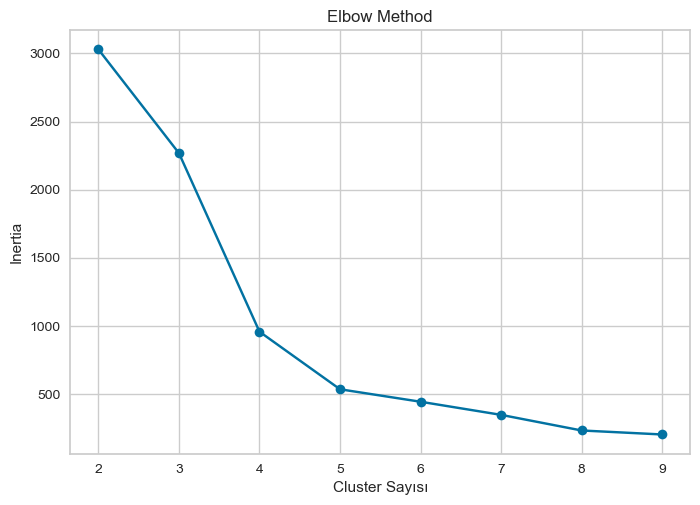

In [25]:
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Cluster Sayısı")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### _Silhouette Score ile Doğrulama_

In [26]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.980
k=3, silhouette score=0.925
k=4, silhouette score=0.927
k=5, silhouette score=0.946
k=6, silhouette score=0.951


### _KMeans Modeli_

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Segment"] = kmeans.fit_predict(rfm_scaled)

In [28]:
segment_summary = rfm.groupby("Segment").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "customer_id": "count"
}).rename(columns={"customer_id": "Customer_Count"})

segment_summary

,Recency,Frequency,Monetary,Customer_Count
Segment,,,,
0,1.0,2.776744,2961.207256,215
1,1.0,1.000000,275.404632,2828
2,1.0,12.600000,105424.563000,10
3,1.0,14.000000,624386.950000,1


In [29]:
x = rfm_scaled

In [30]:
model = KMeans(4)
# 4 kümeli bir KMeans modeli oluşturur.

model = model.fit(x)
# Modeli verilerle eğitir (küme merkezlerini hesaplar).

tahmin = model.predict(x)
# Her gözlemin hangi kümeye ait olduğunu tahmin eder.

rfm['cluster'] = tahmin
# Tahmin edilen küme etiketlerini 'cluster' adlı yeni bir sütun olarak ekler.

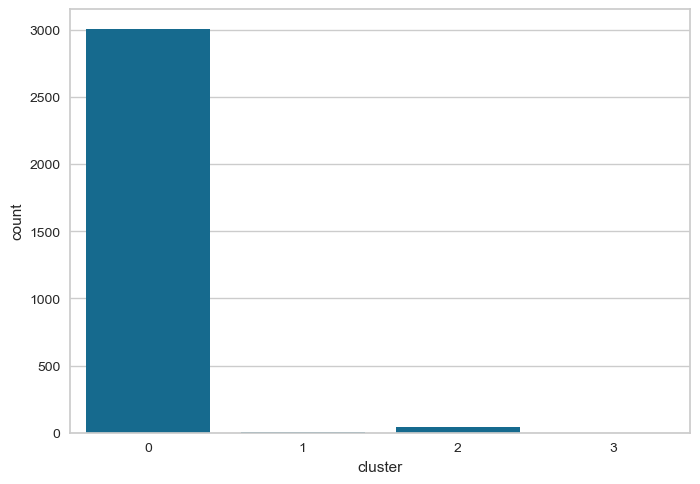

In [31]:
sns.countplot(x=rfm['cluster']);

In [32]:
silhouette_score(x, tahmin)
# Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.
# Skor 1’e yaklaştıkça kümeler daha belirgin ve başarılıdır.

np.float64(0.951228533412532)

In [33]:
# wcss = within cluster sum of squares (küme içi kareler toplamı)
wcss = []  # Her küme sayısı için WCSS değerlerini saklayacak liste
ss = []    # Her küme sayısı için Silhouette skorlarını saklayacak liste

for i in range(2, 10):
    model = KMeans(i)
    # i sayıda küme olacak şekilde KMeans modelini oluşturur.

    model = model.fit(x)
    # Modeli verilerle eğitir (küme merkezlerini hesaplar).

    tahmin = model.predict(x)
    # Her gözlemin hangi kümeye ait olduğunu tahmin eder.

    ssl = silhouette_score(x, tahmin)
    # Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.

    ss.append(ssl)
    # Hesaplanan Silhouette skorunu listeye ekler.

    print(ssl)
    # Her iterasyonda Silhouette skorunu ekrana yazdırır.

    wcss.append(model.inertia_)
    # KMeans modelinin küme içi hata kareleri toplamını (inertia_) listeye ekler.

0.9806651261435736
0.9619736259943127
0.951228533412532
0.9499909516716606
0.9501758617541322
0.9518837858859451
0.9520878919172817
0.9528184640632154


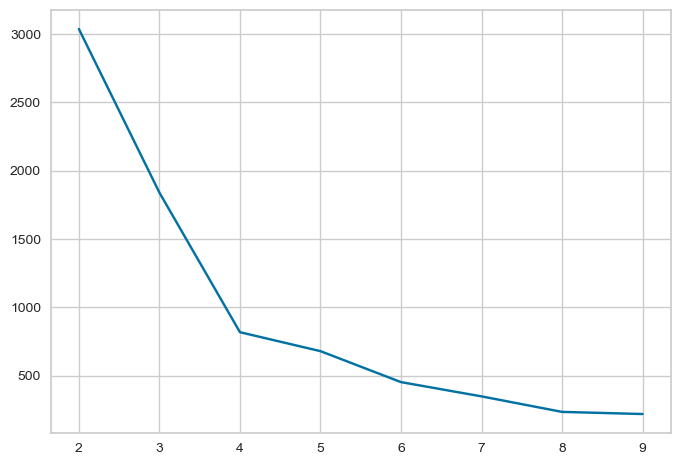

In [34]:
plt.plot(range(2,10), wcss);
# 2'den 9'a kadar olan küme sayıları için WCSS değerlerini çizer.
# Grafikteki “dirsek” (elbow) noktasının kırıldığı yer,
# en uygun küme sayısını (optimum cluster sayısı) gösterir.

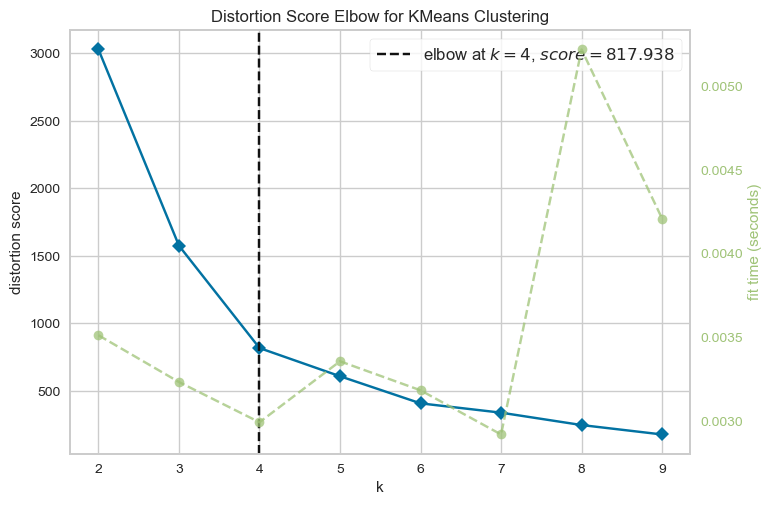

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
vis = KElbowVisualizer(KMeans(), k=(2,10))
# 2 ile 10 arasındaki küme sayıları için KMeans modelini değerlendirir.
# En uygun küme sayısını (elbow noktasını) otomatik olarak bulmak için görselleştirici oluşturur.

vis.fit(x)
# Veriyi modele uygular ve her küme sayısı için WCSS değerlerini hesaplar.

vis.show()
# Elbow (dirsek) grafiğini ekranda gösterir.

In [36]:
data = linkage(x, method='ward', metric='euclidean')

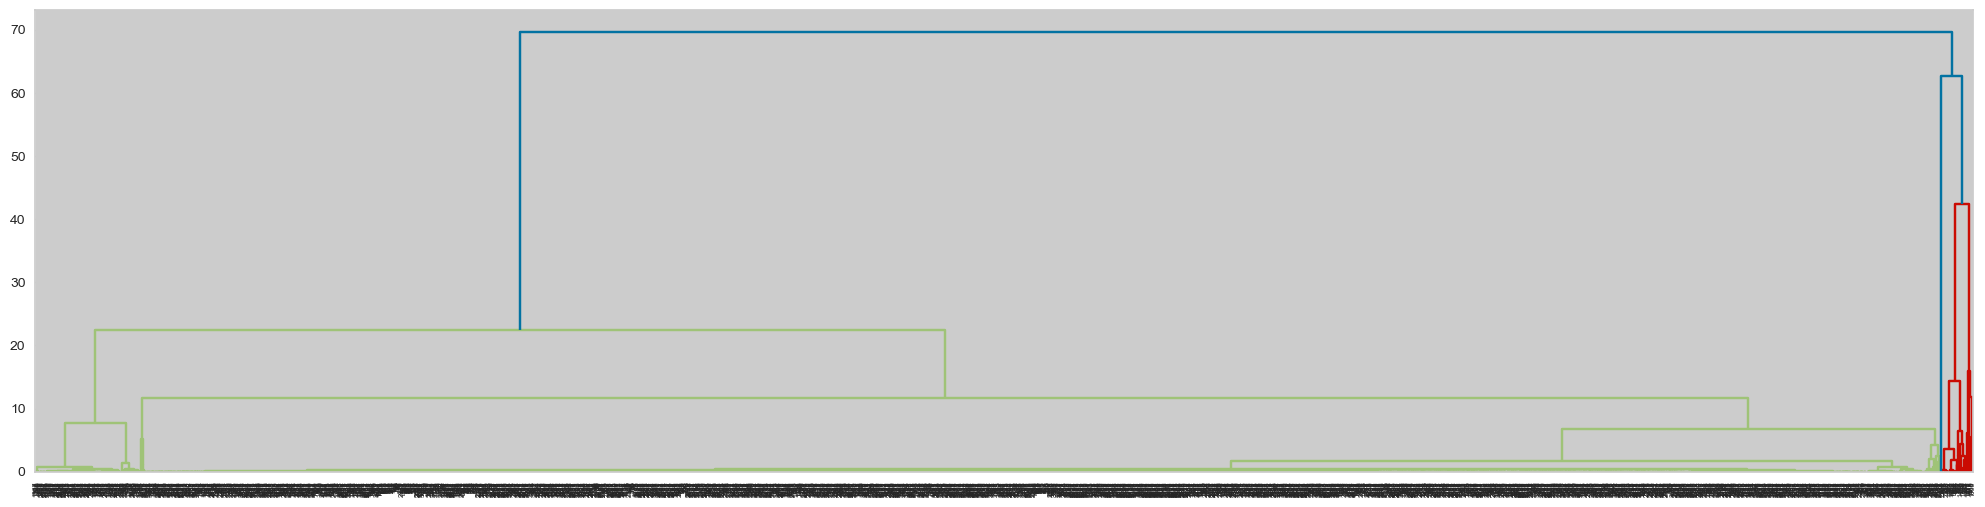

In [37]:
plt.figure(figsize=(25,6))
# Grafiğin boyutunu geniş (25x6 inç) olarak ayarlar, dalları rahat görmek için.

dendrogram(data);
# Hiyerarşik kümeleme sonucunu ağaç yapısında (dendrogram) görselleştirir.
# Dalların birleştiği yükseklikler kümeler arası mesafeyi gösterir.